# EDA: Geographic Variances in Police Shootings: Analyzing Root Causes
- After performing of data imputation and cleaning, dataset can be used for analysis and insights generation. 
- This analysis is focused on aggregation via state.
- This narrative of analysis is chosen because different states have different gun legislation.

Other datasets and files:
- <span style="color:green">US states geojson file</span>.: https://github.com/PublicaMundi/MappingAPI/blob/master/data/geojson/us-states.json. Modifications were performed to use state abbreviations.
- <span style="color:green">US county geojson file</span>: https://gist.github.com/sdwfrost/d1c73f91dd9d175998ed166eb216994a
- <span style="color:green">FBI NICS Firearm Background Check Datafile</span>: https://github.com/BuzzFeedNews/nics-firearm-background-checks
- <span style="color:green">Firearm laws grade file</span>: https://wisevoter.com/state-rankings/states-with-strictest-gun-laws/
- <span style="color:green">US states sizes</span>:
  - https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area
  - https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations
- <span style="color:green">US population: 2010-2024</span>:
  - https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html
  - https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html

In [47]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [48]:
# Importing the dataset
washington_post = pd.read_csv(
    "washington_post_v4_clean.csv",
    index_col=0,
    header=0,
    parse_dates=["date"],
)
washington_post.head()

date threat_type flee_status         armed_with           city  \
id                                                                        
3  2015-01-02       point         not                gun        shelton   
4  2015-01-02       point         not                gun          aloha   
5  2015-01-03        move         not            unarmed        wichita   
8  2015-01-04       point         not            replica  san francisco   
9  2015-01-04       point         not  other_or_multiple          evans   

           county state   latitude   longitude location_precision  ... gender  \
id                                                                 ...          
3           Mason    WA  47.246826 -123.121592      not_available  ...   male   
4      Washington    OR  45.487421 -122.891696      not_available  ...   male   
5        Sedgwick    KS  37.694766  -97.280554      not_available  ...   male   
8   San francisco    CA  37.762910 -122.422001      not_available  ...   male   
9            Weld    CO  40.383937 -104.692261      not_available  ...   male   

    race was_mental_illness_related body_camera  agency_ids      name_source  \
id                                                                             
3      a                       True       False          73  Washington_Post   
4      w                      False       False          70  Washington_Post   
5      h                      False       False         238  Washington_Post   
8      w                       True       False         196  Washington_Post   
9      h                      False       False         473  Washington_Post   

      gender_source       age_source flee_status_source armed_with_source  
id                                                                         
3   Washington_Post  Washington_Post    Washington_Post   Washington_Post  
4   Washington_Post  Washington_Post    Washington_Post   Washington_Post  
5   Washington_Post  Washington_Post    Washington_Post   Washington_Post  
8   Washington_Post  Washington_Post    Washington_Post   Washington_Post  
9   Washington_Post  Washington_Post    Washington_Post   Washington_Post  

[5 rows x 22 columns]

In [49]:
washington_post.tail()

date threat_type   flee_status    armed_with         city  \
id                                                                      
10145 2024-02-12       shoot           not           gun      spokane   
10148 2024-02-12       point  undetermined       replica      arverne   
10151 2024-02-13       shoot           not           gun  chillicothe   
10152 2024-02-13        move           not  edged_weapon     manassas   
10150 2024-02-14       shoot          foot           gun     sheridan   

               county state   latitude   longitude location_precision  ...  \
id                                                                     ...   
10145         Spokane    WA  47.700675 -117.408600              block  ...   
10148          Queens    NY  40.595931  -73.784552            address  ...   
10151          Peoria    IL  40.929025  -89.491431              block  ...   
10152  Prince william    VA  38.804961  -77.516189            address  ...   
10150        Sheridan    WY  44.807861 -106.948420       intersection  ...   

      gender          race was_mental_illness_related body_camera  agency_ids  \
id                                                                              
10145   male  undetermined                      False       False         708   
10148   male  undetermined                      False       False         298   
10151   male             w                      False       False        7496   
10152   male  undetermined                      False       False        2981   
10150   male  undetermined                      False       False   2947;1325   

           name_source    gender_source       age_source flee_status_source  \
id                                                                            
10145  Washington_Post  Washington_Post  Washington_Post    Washington_Post   
10148     undetermined  Washington_Post  Washington_Post       undetermined   
10151  Washington_Post  Washington_Post  Washington_Post    Washington_Post   
10152  Washington_Post  Washington_Post  Washington_Post    Washington_Post   
10150  Washington_Post  Washington_Post  Washington_Post    Washington_Post   

      armed_with_source  
id                       
10145   Washington_Post  
10148   Washington_Post  
10151   Washington_Post  
10152   Washington_Post  
10150   Washington_Post  

[5 rows x 22 columns]

## General time related statistics

### Amount of incidents on different years
<span style="color:green">Goal</span>:
1. Evaluate incident count during different year.

Note: 2024 will be removed from dataset due to incomplete year.

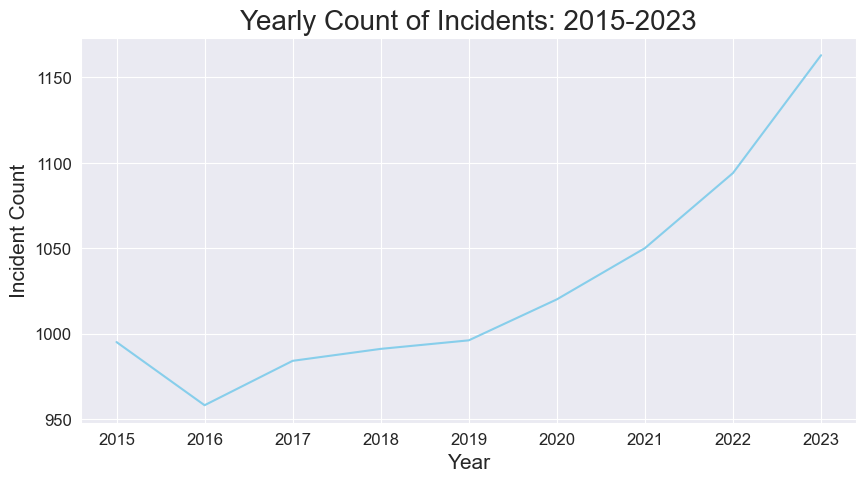

In [50]:
# Counting incidents in a year and plotting them

# Extracting year and counting incident
washington_post["year"] = washington_post["date"].dt.year
yearly_count = washington_post.groupby(["year"])["name"].count()
yearly_count = yearly_count.reset_index()

# Removing 2024
year_2024 = yearly_count["year"] == 2024
yearly_count_2024 = yearly_count.loc[year_2024]
yearly_count.drop(yearly_count.loc[year_2024].index, inplace=True)
yearly_count.rename(columns={"name": "incident_count"}, inplace=True)

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=yearly_count, x="year", y="incident_count", color="skyblue"
)
plt.title("Yearly Count of Incidents: 2015-2023", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Incident Count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.xticks(yearly_count["year"])
plt.grid(True)

plt.show()

In [51]:
# Extracting 3 months with the most incidents
print("Years that have the most incidents:")
yearly_count.sort_values(by="incident_count", ascending=False).head(5)

Years that have the most incidents:


year  incident_count
8  2023            1163
7  2022            1094
6  2021            1050
5  2020            1020
4  2019             996

#### Insights
Yearly count of incidents show increasing tendency each year from 2016.
However, it is worth to note that increase is less than ~200 incidents in 7 years.
Potential reasons for this increase could be:
- Improved database management and tracking of deadly force.
- Covid19 pandemic that started in the end of 2019, which could impact mental health and employment rates, therefore it can affect crime rate.
To conclude or approve or reject these ideas, more in depth analysis is needed.

## Amount of incidents on different months
<span style="color:green">Goal</span>:
1. Evaluate incident count during different months.

Note: 2024 will be removed from dataset due to incomplete year.

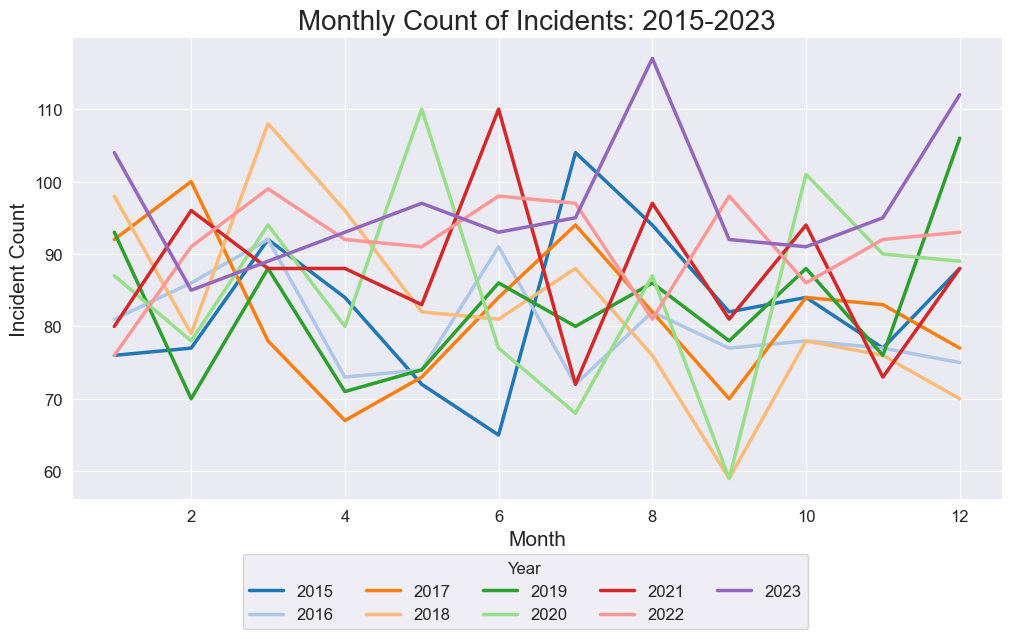

In [52]:
# Counting incidents during different months and plotting them

# Extracting year and counting incident
washington_post["year"] = washington_post["date"].dt.year
washington_post["month"] = washington_post["date"].dt.month
month_count = washington_post.groupby(["year", "month"])[
    "name"
].count()
month_count = month_count.reset_index()

# Removing 2024
year_2024 = month_count["year"] == 2024
month_count_2024 = month_count.loc[year_2024]
month_count.drop(month_count.loc[year_2024].index, inplace=True)
month_count.rename(columns={"name": "incident_count"}, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=month_count,
    x="month",
    y="incident_count",
    hue="year",
    palette="tab20",
    linewidth=2.5,
)
plt.title("Monthly Count of Incidents: 2015-2023", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Incident Count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.legend(
    title="Year",
    fontsize=12,
    title_fontsize=12,
    bbox_to_anchor=(0.8, -0.10),
    ncol=5,
    loc="best",
)
plt.grid(True)
plt.show()

In [53]:
# Extracting 10 months with the most incidents
print("Months and years that have the most incidents")
month_count.sort_values(by="incident_count", ascending=False).head(10)

Months and years that have the most incidents


year  month  incident_count
103  2023      8             117
107  2023     12             112
64   2020      5             110
77   2021      6             110
38   2018      3             108
59   2019     12             106
6    2015      7             104
96   2023      1             104
69   2020     10             101
25   2017      2             100

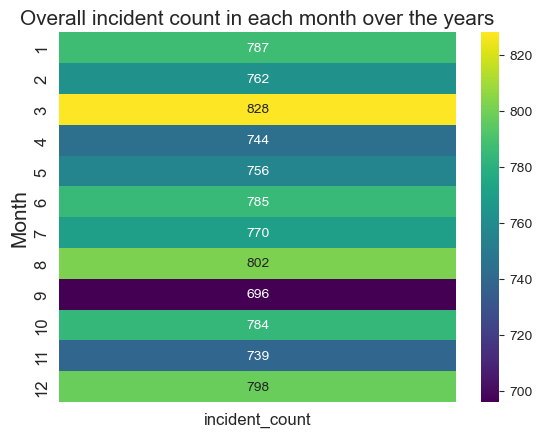

In [54]:
# Months overall incident count
incident_count = (
    month_count.groupby("month")["incident_count"].sum().reset_index()
)
incident_count.set_index("month", inplace=True)
heatmap_data = incident_count.pivot_table(
    index="month", values="incident_count", aggfunc="sum"
)
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt="g")
plt.title(
    "Overall incident count in each month over the years", fontsize=15
)
plt.ylabel("Month", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.show()

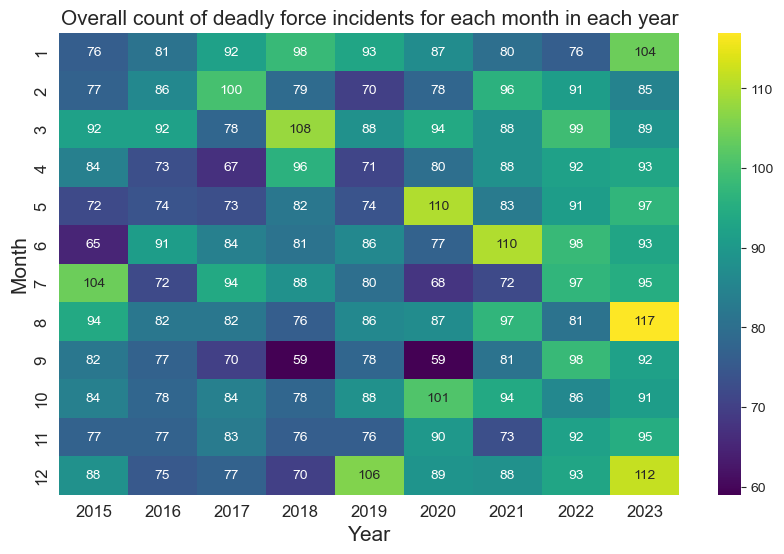

In [55]:
# Creating correlation map to analyze the highest incident count
heatmap_data = month_count.pivot_table(
    index="month",
    columns="year",
    values="incident_count",
    aggfunc="sum",
)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt="g")
plt.title(
    "Overall count of deadly force incidents for each month in each year",
    fontsize=15,
)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Month", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.show()

In [56]:
# Calculating Spearman and Pearson coefficients
correlation_coefficient_p = round(
    month_count["month"].corr(month_count["incident_count"]), 2
)
correlation_coefficient_s = round(
    month_count["month"].corr(
        month_count["incident_count"], method="spearman"
    ),
    2,
)
print(
    f"Pearson correlation coefficient between month and incident count is"
    f" {correlation_coefficient_p}."
)
print(
    f"Spearman correlation coefficient between month and incident count is "
    f"{correlation_coefficient_s}."
)

Pearson correlation coefficient between month and incident count is -0.06.
Spearman correlation coefficient between month and incident count is -0.07.


#### Insights
- From monthly incident graph it is hard to say if any month has significantly more incidents.
- Dataframe sorting and filtering show that December (12) month has more incidents.
- Highest amount of incidents happened on March, August and December.
- Pearson and Spearman correlation show, month and incident count is not related.

## Daily Amount of incidents
<span style="color:green">Goal</span>:
1. Evaluate incident count during different days.

Note: 2024 will be removed from dataset due to incomplete year.

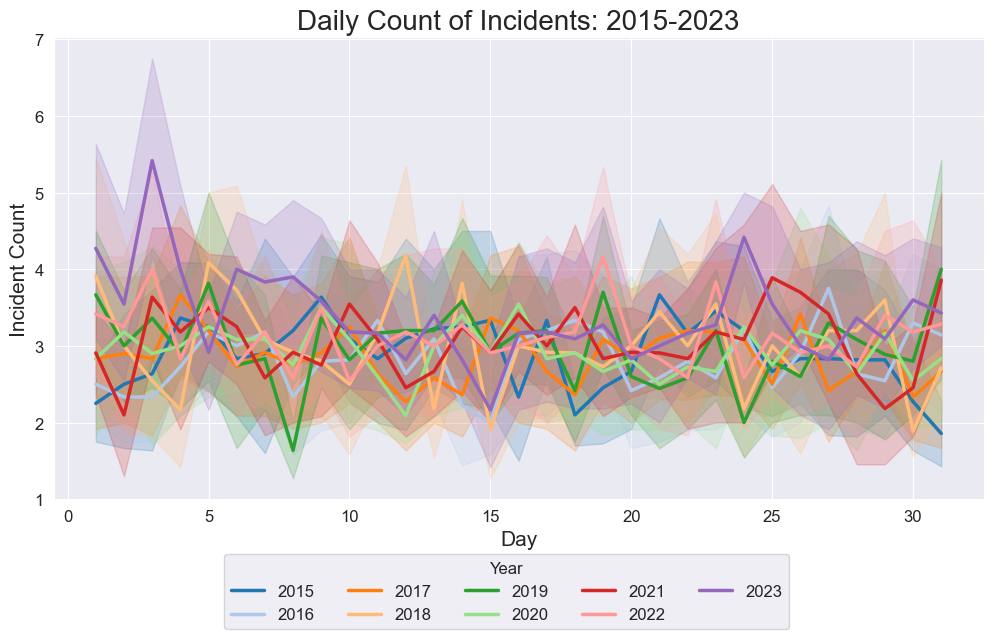

In [57]:
# Counting incidents and plotting them

# Extracting year and counting incident
washington_post["year"] = washington_post["date"].dt.year
washington_post["month"] = washington_post["date"].dt.month
washington_post["day"] = washington_post["date"].dt.day
day_count = washington_post.groupby(["year", "month", "day"])[
    "name"
].count()
day_count = day_count.reset_index()

# Removing 2024
year_2024 = day_count["year"] == 2024
day_count_2024 = day_count.loc[year_2024]
day_count.drop(day_count.loc[year_2024].index, inplace=True)
day_count.rename(columns={"name": "incident_count"}, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=day_count,
    x="day",
    y="incident_count",
    hue="year",
    palette="tab20",
    linewidth=2.5,
)
plt.title("Daily Count of Incidents: 2015-2023", fontsize=20)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Incident Count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.legend(
    title="Year",
    fontsize=12,
    title_fontsize=12,
    bbox_to_anchor=(0.8, -0.10),
    ncol=5,
    loc="best",
)
plt.grid(True)
plt.show()

In [58]:
# Extracting 10 days with the most incidents
print("Days, months and years that have the most incidents:")
day_count.sort_values(by="incident_count", ascending=False).head(10)

Days, months and years that have the most incidents:


year  month  day  incident_count
3045  2023     12    3              10
2947  2023      8   25               9
1191  2018      6   29               9
1377  2019      1   28               9
1823  2020      5   26               9
2857  2023      5   19               9
2200  2021      6   24               9
1112  2018      4    1               9
2349  2021     11   28               9
3043  2023     12    1               9

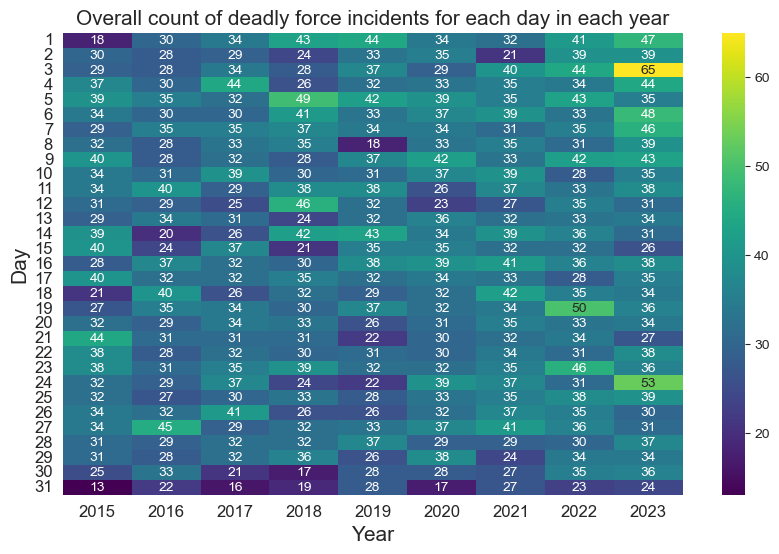

In [59]:
# Creating correlation map to analyze the highest incident count
heatmap_data = day_count.pivot_table(
    index="day",
    columns="year",
    values="incident_count",
    aggfunc="sum",
)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt="g")
plt.title(
    "Overall count of deadly force incidents for each day in each year",
    fontsize=15,
)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Day", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.show()

In [60]:
# Calculating mode of days
days_that_repeats = day_count["day"].mode().astype(str).to_list()
print(
    f"Days of the month which most often "
    f"have incidents are "
    f"{(', '.join(days_that_repeats))}."
)

Days of the month which most often have incidents are 6, 11, 15.


In [61]:
# Days overall incident count
print(
    "Overall incident counts on different day of the month, top3 days:"
)
incident_count_d = (
    day_count.groupby("day")["incident_count"].sum().reset_index()
)
incident_count_d.set_index("day", inplace=True)
incident_count_d.sort_values(
    by="incident_count", ascending=False
).head(3)

Overall incident counts on different day of the month, top3 days:


incident_count
day                
5               349
3               334
9               325

In [62]:
# Calculating Spearman and Pearson coefficients
correlation_coefficient_p = round(
    day_count["day"].corr(day_count["incident_count"]), 2
)
correlation_coefficient_s = round(
    day_count["day"].corr(
        day_count["incident_count"], method="spearman"
    ),
    2,
)
print(
    f"Pearson correlation coefficient between day and incident count is"
    f" {correlation_coefficient_p}."
)
print(
    f"Spearman correlation coefficient between day and incident count is "
    f"{correlation_coefficient_s}."
)

Pearson correlation coefficient between day and incident count is -0.04.
Spearman correlation coefficient between day and incident count is -0.04.


#### Insights
- From graph and incident table 2023-12-03 is identified as the most incidents having day.
- Mode calculations show that 6, 11, and 15 days of month are the most repeating days in the dataset.
- Overall highest incident count through the years have 5th, 3rd and 9th days of the month.
- Pearson and Spearman correlation show, that day and incident count are not related.

## Amount of incidents in different states 2015-2024
<span style="color:green">Goal</span>: 
1. Identify which states have the most police involved shooting accidents.

Top five states make up 38.0 % of all incidents.


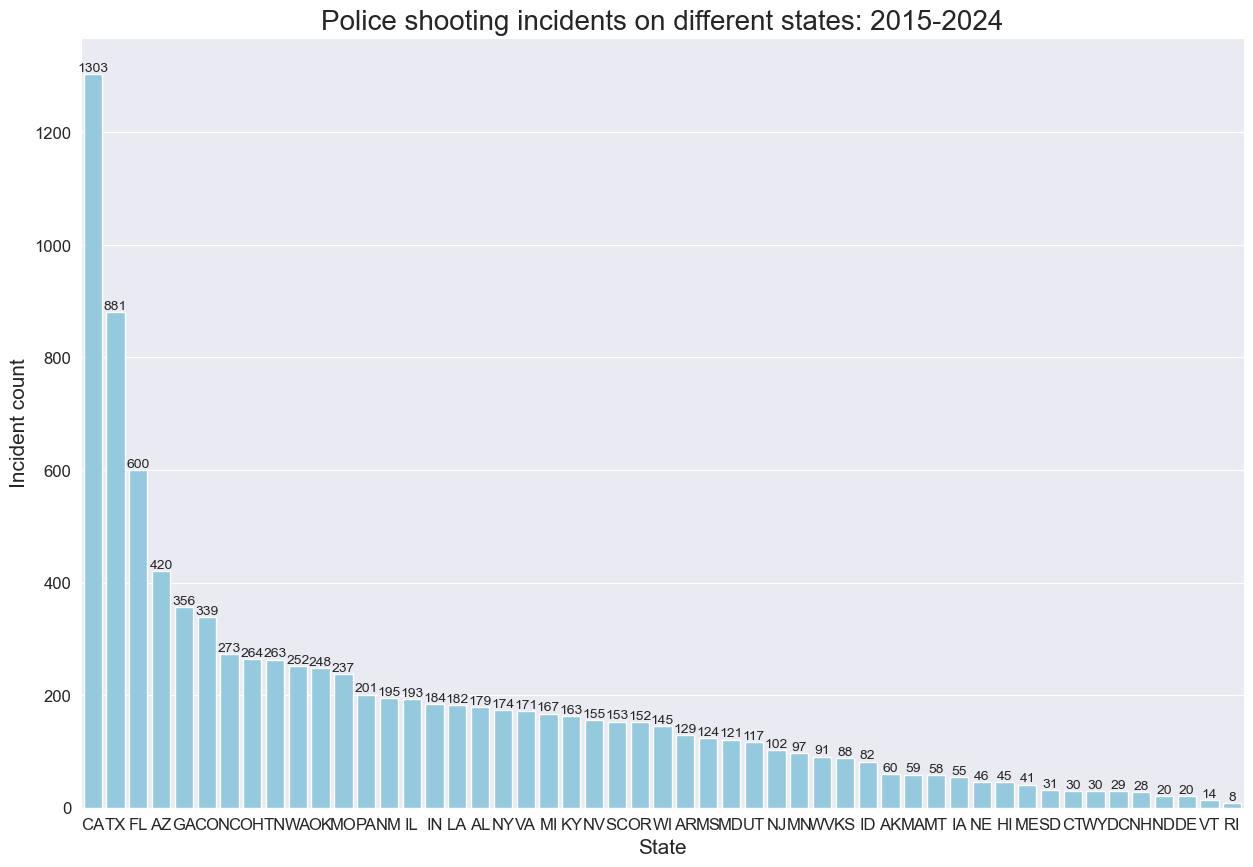

In [63]:
# Group by 'state' and count dates
date_counts_states = washington_post.groupby("state")["date"].count()
date_counts_states = date_counts_states.sort_values(ascending=False)

# Percentage of incidents in top 5 states
incidents_count = washington_post.shape[0]
top_five_states_incidents = date_counts_states.head(5).sum()
percent_of_inc = round(
    top_five_states_incidents / incidents_count * 100, 0
)
print(
    f"Top five states make up "
    f"{percent_of_inc} % of all incidents."
)

# Plotting the results
plt.figure(figsize=(15, 10))
sns.barplot(data=date_counts_states, color="skyblue")
plt.title(
    "Police shooting incidents on different states: 2015-2024",
    fontsize=20,
)
plt.xlabel("State", fontsize=15)
plt.ylabel("Incident count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

# Add labels
for i, v in enumerate(date_counts_states.values):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.show()

In [64]:
# Mapping the counts
color_ramp = [
    "#0000ff",  # Blue
    "#00ff00",  # Green
    "#ffff00",  # Yellow
    "#ff7f00",  # Orange
    "#ff0000",  # Red
]
map = folium.Map(location=[37, -102], zoom_start=3)
file_path = (
    "/Users/agnekrupinskaite/PycharmProjects"
    "/agkrupi-DWWP.4.1/GeoJson/us-states.json"
)
geo_json_data = file_path
folium.Choropleth(
    geo_data=geo_json_data,
    name="choropleth",
    data=date_counts_states,
    columns=["state", "date"],
    key_on="feature.properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Incidents",
    colors=color_ramp,
    bins=5,
).add_to(map)
folium.LayerControl().add_to(map)

file_path = (
    "/Users/agnekrupinskaite/PycharmProjects/"
    "agkrupi-DWWP.4.1/Folium maps/"
    "amount_of_incidents_in_different_states.html"
)
print(
    "State mapping according to the police deadly force incident count"
)
map.save(file_path)
map

State mapping according to the police deadly force incident count


#### Insights: 
During the years of 2015-2024. The top 5 states that had the most incidents related to police aggression were:
1. California (CA)
2. Texas (TX)
3. Florida (FL)
4. Arizona (AZ)
5. Georgia (GA)

Top five states make up 38.0 % of all incidents.

## States that have the most incidents with certain race groups
<span style="color:green">Goal</span>: 
1. Identify if any certain race groups are targeted.
2. Check if the states that have most specific race groups involved also have high overall incidents.

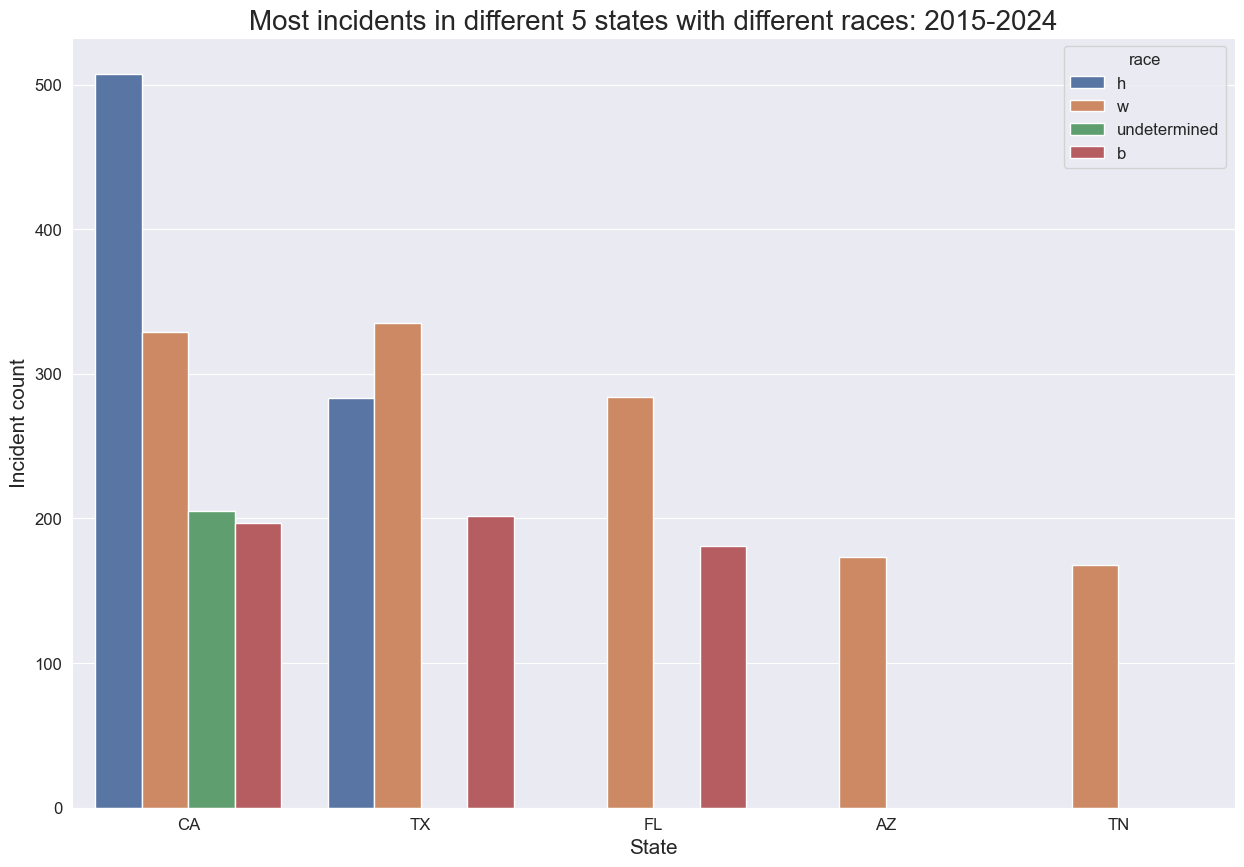

In [65]:
# Plotting race involvement in accidents
date_counts_race = washington_post.groupby(["state", "race"])[
    "name"
].count()
date_counts_race = date_counts_race.sort_values(ascending=False)
date_counts_race = date_counts_race.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(
    data=date_counts_race.head(11),
    x="state",
    y="name",
    hue="race",
    palette="deep",
)
plt.title(
    "Most incidents in different 5 states "
    "with different races: 2015-2024",
    fontsize=20,
)
plt.xlabel("State", fontsize=15)
plt.ylabel("Incident count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.legend(title="race", fontsize=12, title_fontsize=12)
plt.show()

#### Insights: 
- States that have most incidents with specific race groups are:
1. California (CA)
2. Texas (TX)
3. Florida (FL)
4. Arizona (AZ)
5. Tennessee (TN)

- Four out of 5 states also have the most shooting incidents overall.
- Most people involved in accidents in California are Hispanic.
- Most people involved in accidents in Texas are White.
- Most black people are involved in accidents in Texas.

## States that have the most mental illness related incidents
<span style="color:green">Goal</span>: 
1. Identify if mental illness affected people are more involved into the accidents.
2. Identify if mental illness did not affected people that are involved into the accidents.
2. Check if the states that have most mental illness related incidents also have high overall incidents.

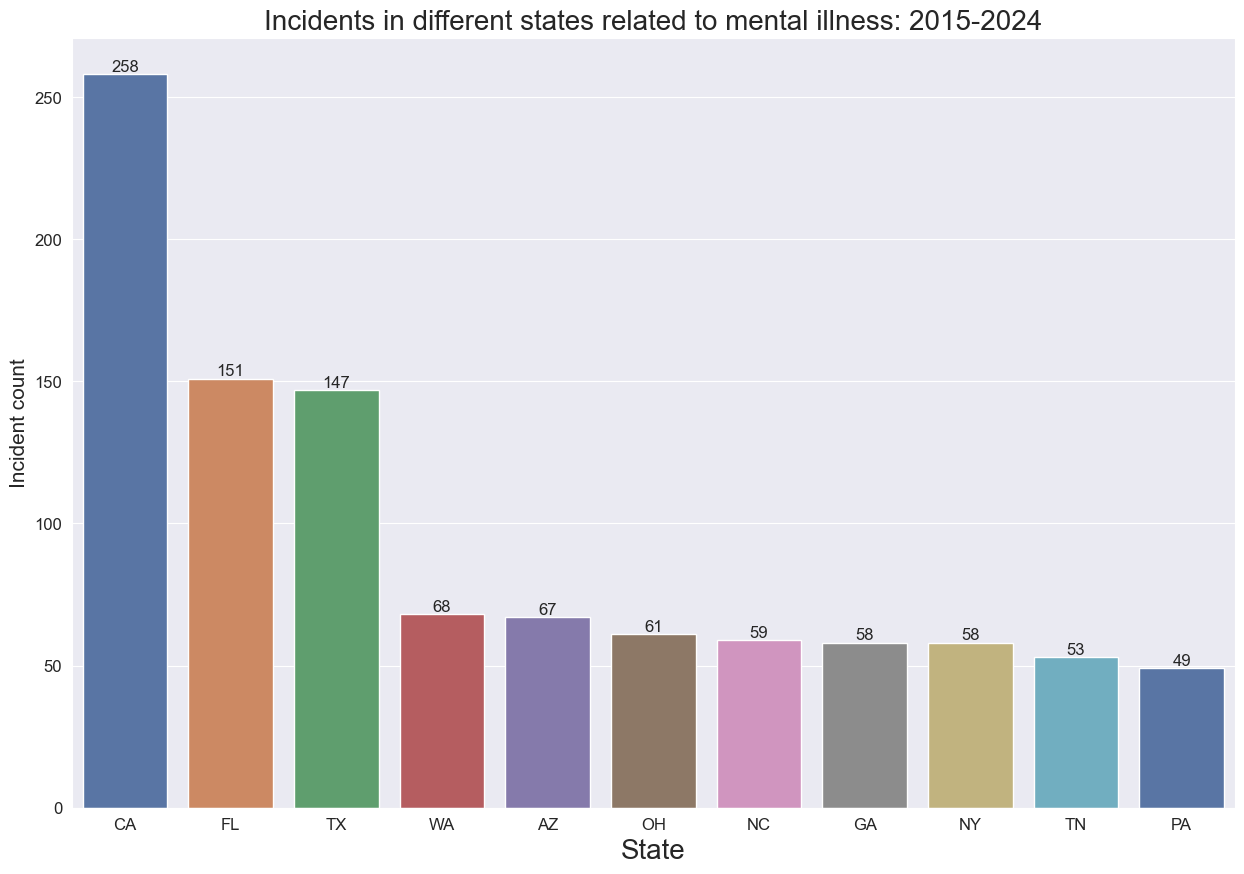

In [66]:
# Plotting mental illness related incidents involvement in accidents
mir = washington_post.was_mental_illness_related == True
date_counts_mir = (
    washington_post[mir]
    .groupby(["state", "was_mental_illness_related"])["name"]
    .count()
)
date_counts_mir = date_counts_mir.sort_values(ascending=False)
date_counts_mir = date_counts_mir.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(
    data=date_counts_mir.head(11),
    x="state",
    y="name",
    hue="state",
    palette="deep",
)
plt.title(
    "Incidents in different states related "
    "to mental illness: 2015-2024",
    fontsize=20,
)
plt.xlabel("State", fontsize=20)
plt.ylabel("Incident count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

# Adding labels to have more informative graphs
for i, v in enumerate(date_counts_mir["name"].head(11)):
    plt.text(i, v, str(v), ha="center", va="bottom", fontsize=12)

plt.show()

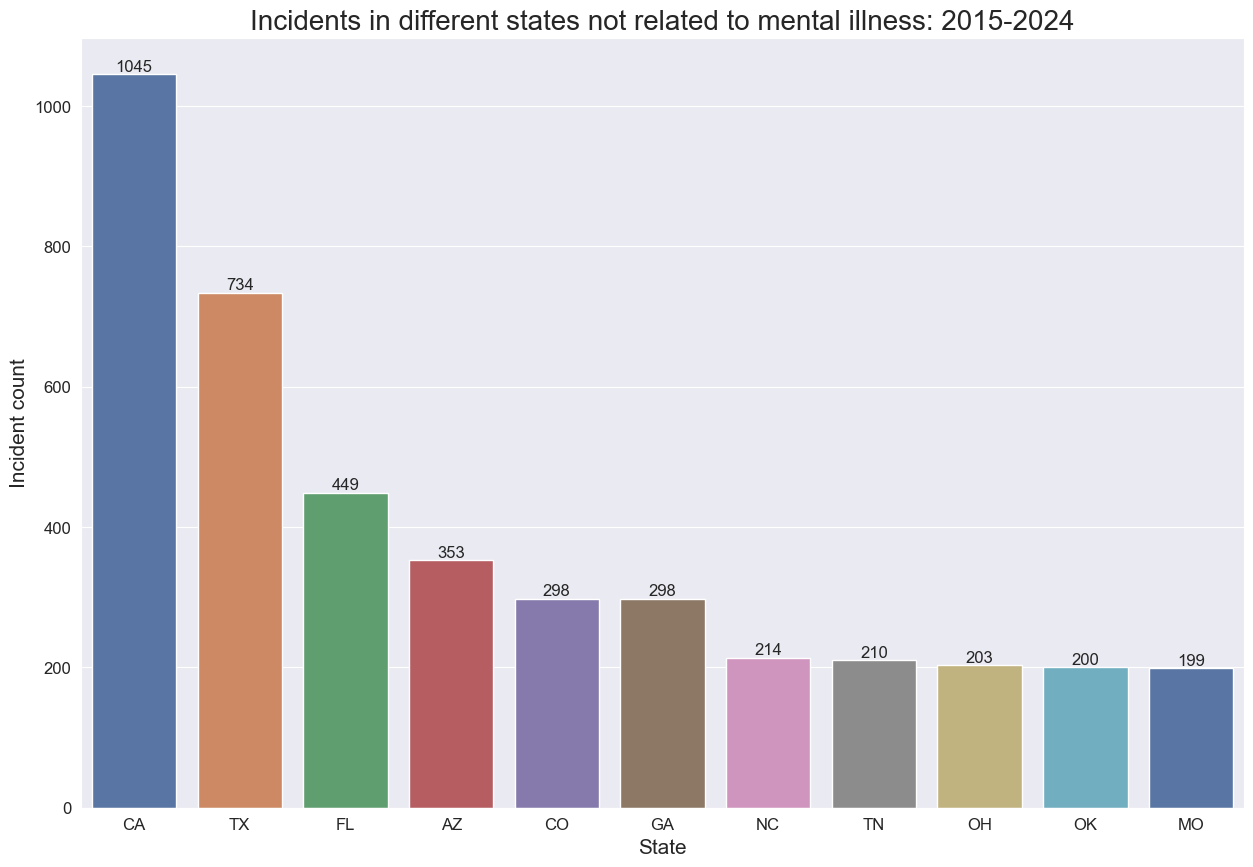

In [67]:
# Plotting non-mental illness related accidents
nmir = washington_post.was_mental_illness_related == False
date_counts_nmir = (
    washington_post[nmir]
    .groupby(["state", "was_mental_illness_related"])["name"]
    .count()
)
date_counts_nmir = date_counts_nmir.sort_values(ascending=False)
date_counts_nmir = date_counts_nmir.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(
    data=date_counts_nmir.head(11),
    x="state",
    y="name",
    hue="state",
    palette="deep",
)
plt.title(
    "Incidents in different states not related "
    "to mental illness: 2015-2024",
    fontsize=20,
)
plt.xlabel("State", fontsize=15)
plt.ylabel("Incident count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

# Adding labels to have more informative graphs
for i, v in enumerate(date_counts_nmir["name"].head(11)):
    plt.text(i, v, str(v), ha="center", va="bottom", fontsize=12)

plt.show()

#### Insights:
- States that have most incidents related to mentally ill people and mentally not ill people:
1. California (CA)
2. Florida (FL)
3. Texas (TX)

- Could be that increased amount of mentally ill people related incidents is just related to higher amount of overall incidents in California, Florida and Texas.
- More deadly police force incidents are non-mental illness related.

## Narrowing down the scope of analysis
During primary analysis of the accidents and their factors such as race and mental illness, 3 states stood out. Therefore, the analysis will be carried out evaluating factors that are driving police force in these 3 states:
1. California
2. Florida
3. Texas

In [68]:
# Filtering necessary states
california = washington_post.state == "CA"
florida = washington_post.state == "FL"
texas = washington_post.state == "TX"

filtered_washington_post = washington_post[
    california | florida | texas
].copy()

## Date involvement
<span style="color:green">Goal</span>:
1. To analyze yearly deadly force changes in California, FLorida and Texas.
2. To analyze monthly deadly force changes in California, Florida and Texas.

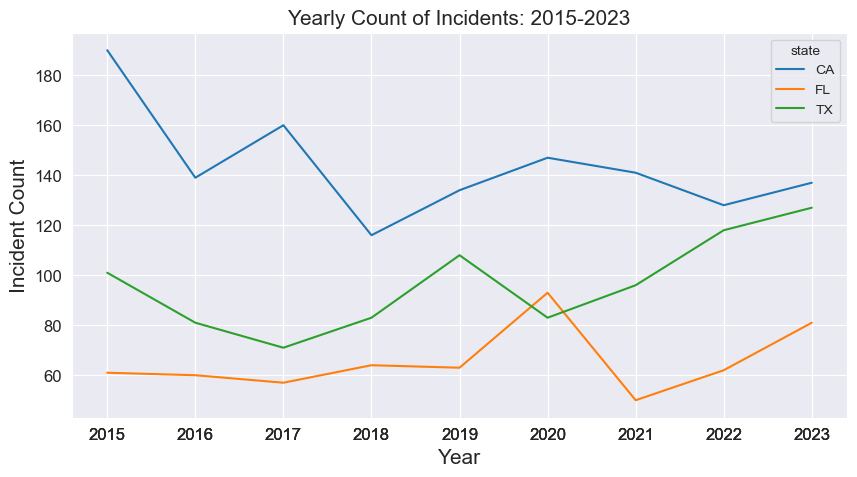

In [69]:
# Counting yearly incidents and plotting
# Extracting year and counting incident
filtered_washington_post["year"] = filtered_washington_post[
    "date"
].dt.year
yearly_count = filtered_washington_post.groupby(["year", "state"])[
    "name"
].count()
yearly_count = yearly_count.reset_index()

# Removing 2024
year_2024 = yearly_count["year"] == 2024
yearly_count_2024 = yearly_count.loc[year_2024]
yearly_count.drop(yearly_count.loc[year_2024].index, inplace=True)
yearly_count.rename(columns={"name": "incident_count"}, inplace=True)

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=yearly_count,
    x="year",
    y="incident_count",
    color="skyblue",
    hue="state",
)
plt.title("Yearly Count of Incidents: 2015-2023", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Incident Count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.xticks(yearly_count["year"])
plt.grid(True)

plt.show()

In [70]:
# Counting incidents during different months and plotting them
# Extracting year and counting incident
filtered_washington_post["year"] = filtered_washington_post[
    "date"
].dt.year
filtered_washington_post["month"] = filtered_washington_post[
    "date"
].dt.month
month_count = filtered_washington_post.groupby(["year", "month"])[
    "name"
].count()
month_count = month_count.reset_index()

# Removing 2024
year_2024 = month_count["year"] == 2024
month_count_2024 = month_count.loc[year_2024]
month_count.drop(month_count.loc[year_2024].index, inplace=True)
month_count.rename(columns={"name": "incident_count"}, inplace=True)

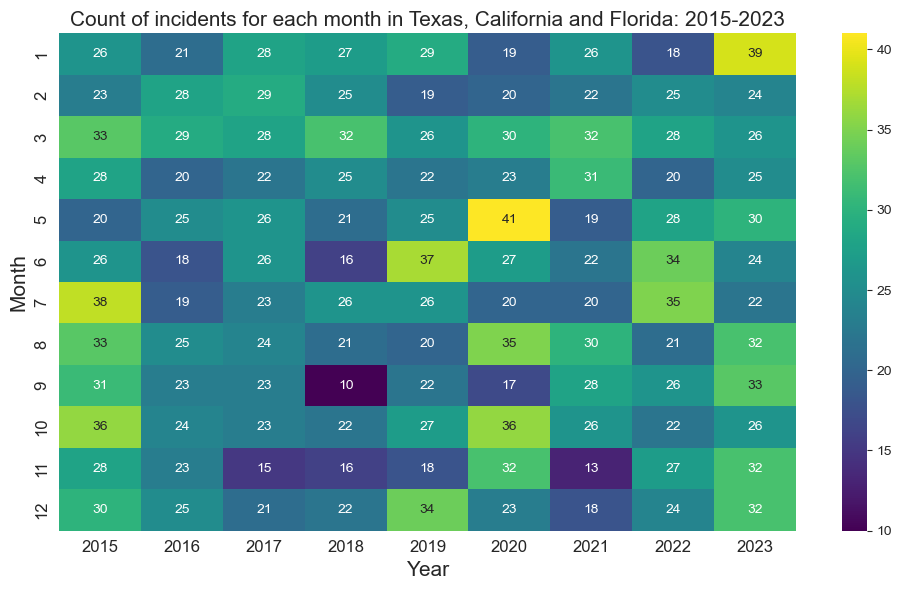

In [71]:
# Creating correlation map to analyze the highest incident count
heatmap_data = month_count.pivot_table(
    index="month",
    columns="year",
    values="incident_count",
    aggfunc="sum",
)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt="g")
plt.title(
    "Count of incidents for each month in Texas, "
    "California and Florida: 2015-2023",
    fontsize=15,
)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Month", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.tight_layout()
plt.show()

In [72]:
# Calculating Spearman and Pearson coefficients
correlation_coefficient_p = round(
    month_count["month"].corr(month_count["incident_count"]), 2
)
correlation_coefficient_s = round(
    month_count["month"].corr(
        month_count["incident_count"], method="spearman"
    ),
    2,
)
print(
    f"Pearson correlation coefficient between month and "
    f"incident count in California, Texas and Florida is"
    f" {correlation_coefficient_p}."
)
print(
    f"Spearman correlation coefficient between month and "
    f"incident count in California, Texas and Florida is "
    f"{correlation_coefficient_s}."
)

Pearson correlation coefficient between month and incident count in California, Texas and Florida is -0.07.
Spearman correlation coefficient between month and incident count in California, Texas and Florida is -0.06.


#### Insights
- Texas had the highest amount of incidents in 2020.
- California had the highest amount of incidents in 2015.
- Texas had the highest amount of incidents in 2019.
- Most incidents in California, Texas and Florida happened in 2020 May, 2023 January and 2015 July.

## Gender involvement in incidents
<span style="color:green">Goal</span>:
1. Evaluate if any of the gender groups are more involved in incidents in the California, Florida or Texas.

In [73]:
# Overall female involvement in the fatal shooting accidents
total_accidents = filtered_washington_post.shape[0]
female = filtered_washington_post.gender == "female"
female_count = filtered_washington_post[female].shape[0]
female_percent = round(female_count * 100 / total_accidents, 0)
print(
    f"Female percentage involved in fatal shooting accidents: "
    f"{female_percent} %."
)

Female percentage involved in fatal shooting accidents: 5.0 %.


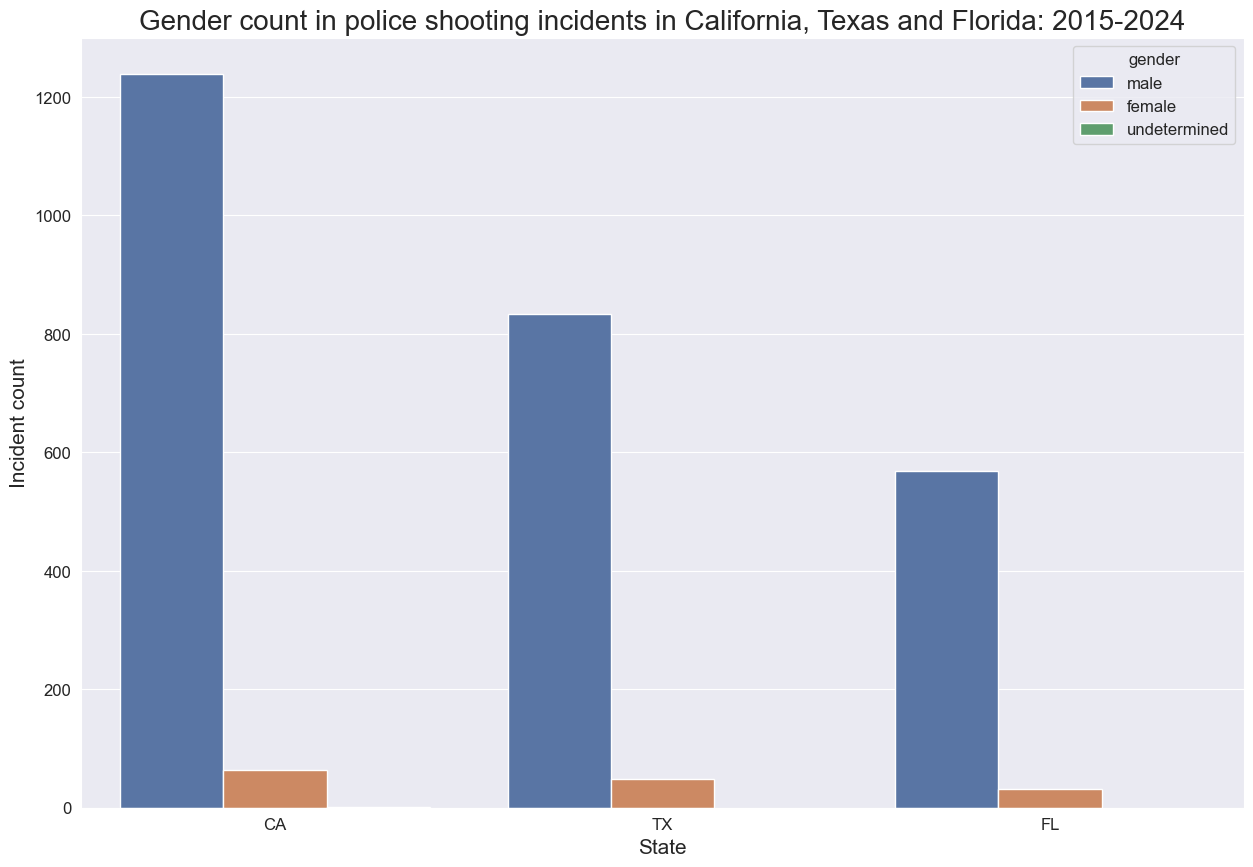

In [74]:
# Counting different genders involved in incidents
date_counts_gender = filtered_washington_post.groupby(
    ["state", "gender"]
)["name"].count()
date_counts_gender = date_counts_gender.sort_values(ascending=False)
date_counts_gender = date_counts_gender.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(
    data=date_counts_gender,
    x="state",
    y="name",
    hue="gender",
    palette="deep",
)
plt.title(
    "Gender count in police shooting incidents in "
    "California, Texas and Florida: 2015-2024",
    fontsize=20,
)
plt.xlabel("State", fontsize=15)
plt.ylabel("Incident count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.legend(title="gender", fontsize=12, title_fontsize=12)
plt.show()

#### Insights:
- Fatal shooting incidents mostly involve men gender group in Texas, California and Florida. 
- Female percentage involved in fatal shooting accidents in Texas, California and Florida is only 5.0 %.

Considerations:
- Could be biased dataset that contains more male observations.
- Males behave more aggressively when in contact with police officers.

## Flee status and threat type
<span style="color:green">Goal</span>:
1. Analyze if more incidents happened when people were fleeing in California, Texas, Florida.
2. Which method for fleeing was mostly related to the use of deadly force?
3. Analyze how threat type affects the accident count.
4. Which incident count is higher: fleeing and threteaning and not fleeing and thretening?

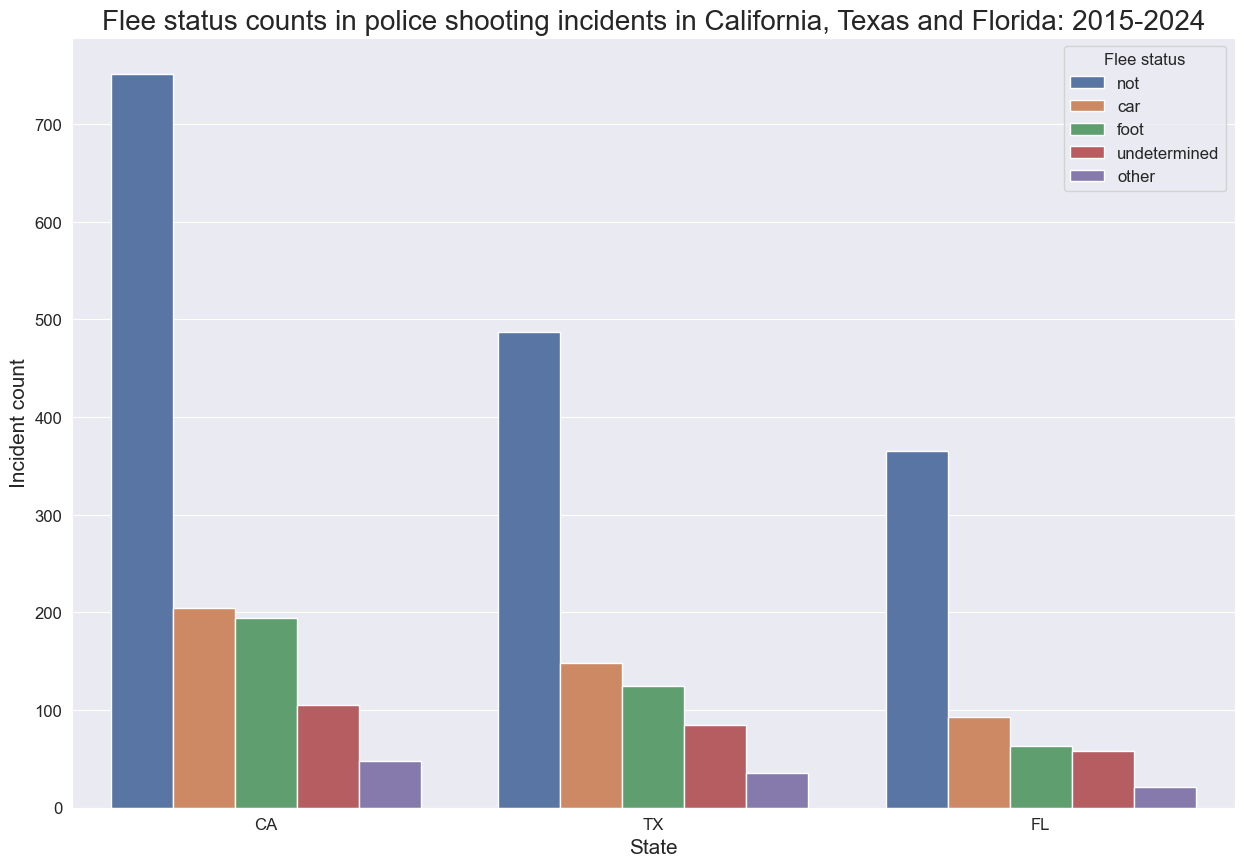

In [75]:
# Counting fleeing status related incidents
date_counts_fs = filtered_washington_post.groupby(
    ["state", "flee_status"]
)["name"].count()
date_counts_fs = date_counts_fs.sort_values(ascending=False)
date_counts_fs = date_counts_fs.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(
    data=date_counts_fs,
    x="state",
    y="name",
    hue="flee_status",
    palette="deep",
)
plt.title(
    "Flee status counts in police shooting incidents in "
    "California, Texas and Florida: 2015-2024",
    fontsize=20,
)
plt.xlabel("State", fontsize=15)
plt.ylabel("Incident count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.legend(title="Flee status", fontsize=12, title_fontsize=12)
plt.show()

In [76]:
# Calculating the percentage of undetermined fleeing state incidents
total_count = date_counts_fs.name.sum()
undetermined = date_counts_fs.flee_status == "undetermined"
undetermined_count = date_counts_fs.name[undetermined].sum()
undetermined_percent = round(
    undetermined_count * 100 / total_count, 0
)
print(
    f"The amount cases that have undetermined flee status in "
    f"California, Texas and Florida is {undetermined_percent} %."
)

The amount cases that have undetermined flee status in California, Texas and Florida is 9.0 %.


In [77]:
# Identifying which flee_status is has higher incident count
print("Flee status states that have the highest amount of incidents:")
date_counts_fs.head(3)

Flee status states that have the highest amount of incidents:


state flee_status  name
0    CA         not   751
1    TX         not   487
2    FL         not   365

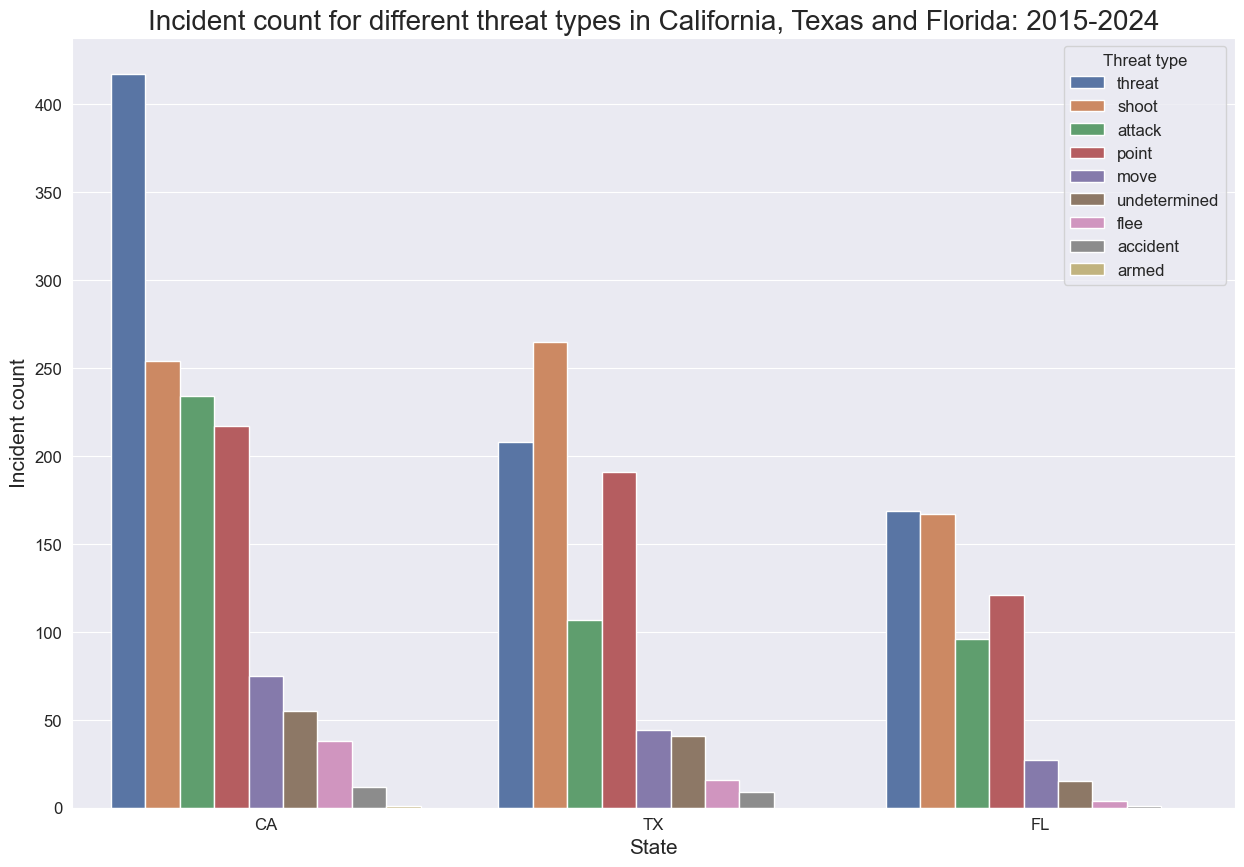

In [78]:
# Counting incidents for different threat types
date_counts_tt = filtered_washington_post.groupby(
    ["state", "threat_type"]
)["name"].count()
date_counts_tt = date_counts_tt.sort_values(ascending=False)
date_counts_tt = date_counts_tt.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(
    data=date_counts_tt,
    x="state",
    y="name",
    hue="threat_type",
    palette="deep",
)
plt.title(
    "Incident count for different threat types in "
    "California, Texas and Florida: 2015-2024",
    fontsize=20,
)
plt.xlabel("State", fontsize=15)
plt.ylabel("Incident count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.legend(title="Threat type", fontsize=12, title_fontsize=12)
plt.show()

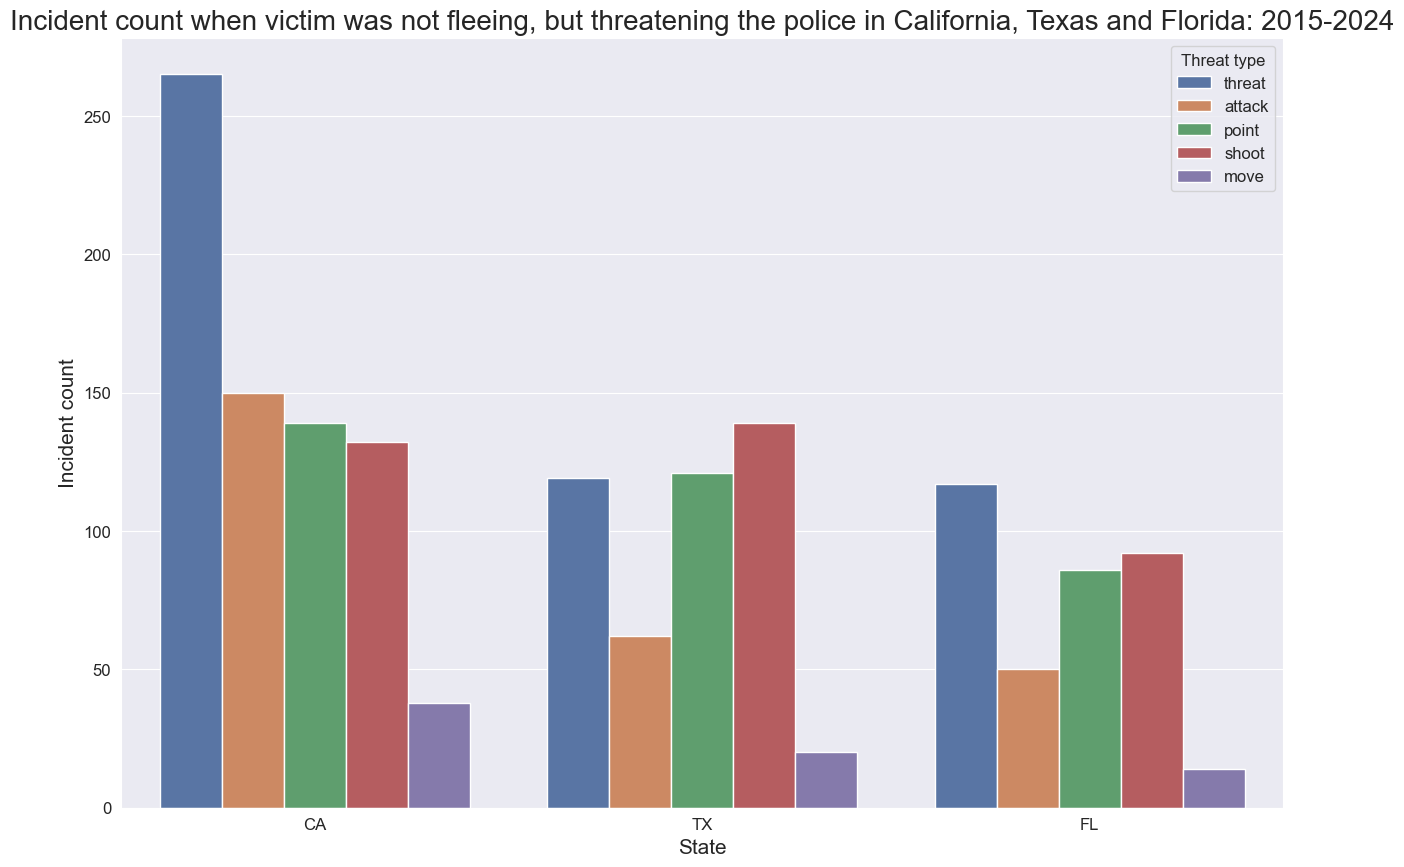

In [79]:
# Not fleeing but threatening incidents
threatening_1 = filtered_washington_post.threat_type != "accident"
threatening_2 = filtered_washington_post.threat_type != "flee"
threatening_3 = filtered_washington_post.threat_type != "undetermined"
not_fleeing = filtered_washington_post.flee_status == "not"
not_undetermined = (
    filtered_washington_post.flee_status != "undetermined"
)
date_counts_nft = (
    filtered_washington_post[
        not_fleeing
        & not_undetermined
        & threatening_1
        & threatening_2
        & threatening_3
    ]
    .groupby(["state", "threat_type"])["name"]
    .count()
)
date_counts_nft = date_counts_nft.sort_values(ascending=False)
date_counts_nft = date_counts_nft.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(
    data=date_counts_nft,
    x="state",
    y="name",
    hue="threat_type",
    palette="deep",
)
plt.title(
    "Incident count when victim was not "
    "fleeing, but threatening the police in California, "
    "Texas and Florida: 2015-2024",
    fontsize=20,
)
plt.xlabel("State", fontsize=15)
plt.ylabel("Incident count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.legend(title="Threat type", fontsize=12, title_fontsize=12)
plt.show()

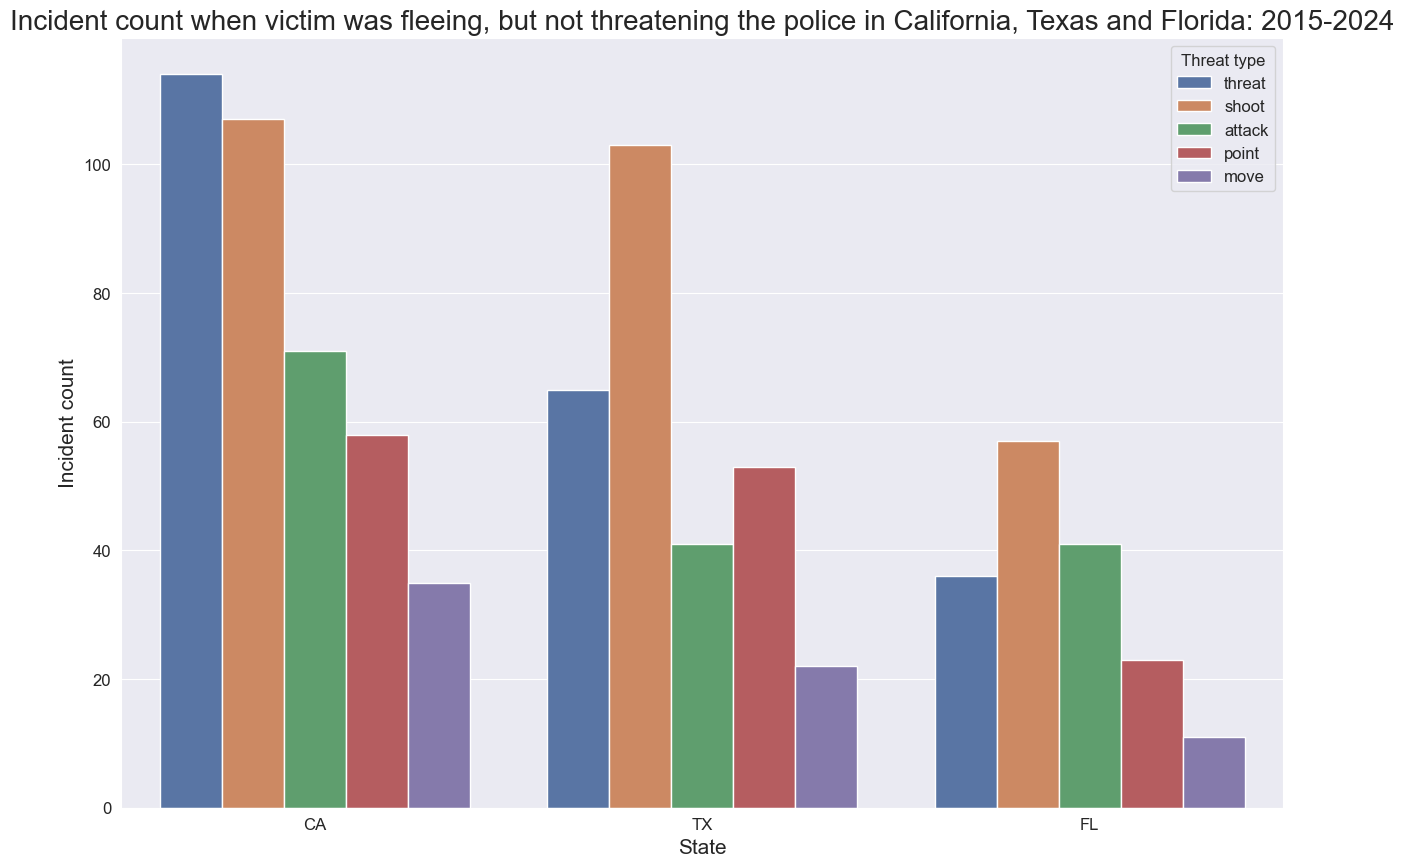

In [80]:
# Incidents where victims were fleeing, but not threatening
fleeing = filtered_washington_post.flee_status != "not"
date_counts_fst = (
    filtered_washington_post[
        fleeing
        & not_undetermined
        & threatening_1
        & threatening_2
        & threatening_3
    ]
    .groupby(["state", "threat_type"])["name"]
    .count()
)
date_counts_fst = date_counts_fst.sort_values(ascending=False)
date_counts_fst = date_counts_fst.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(
    data=date_counts_fst,
    x="state",
    y="name",
    hue="threat_type",
    palette="deep",
)
plt.title(
    "Incident count when victim was "
    "fleeing, but not threatening the police in California, "
    "Texas and Florida: 2015-2024",
    fontsize=20,
)
plt.xlabel("State", fontsize=15)
plt.ylabel("Incident count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.legend(title="Threat type", fontsize=12, title_fontsize=12)
plt.show()

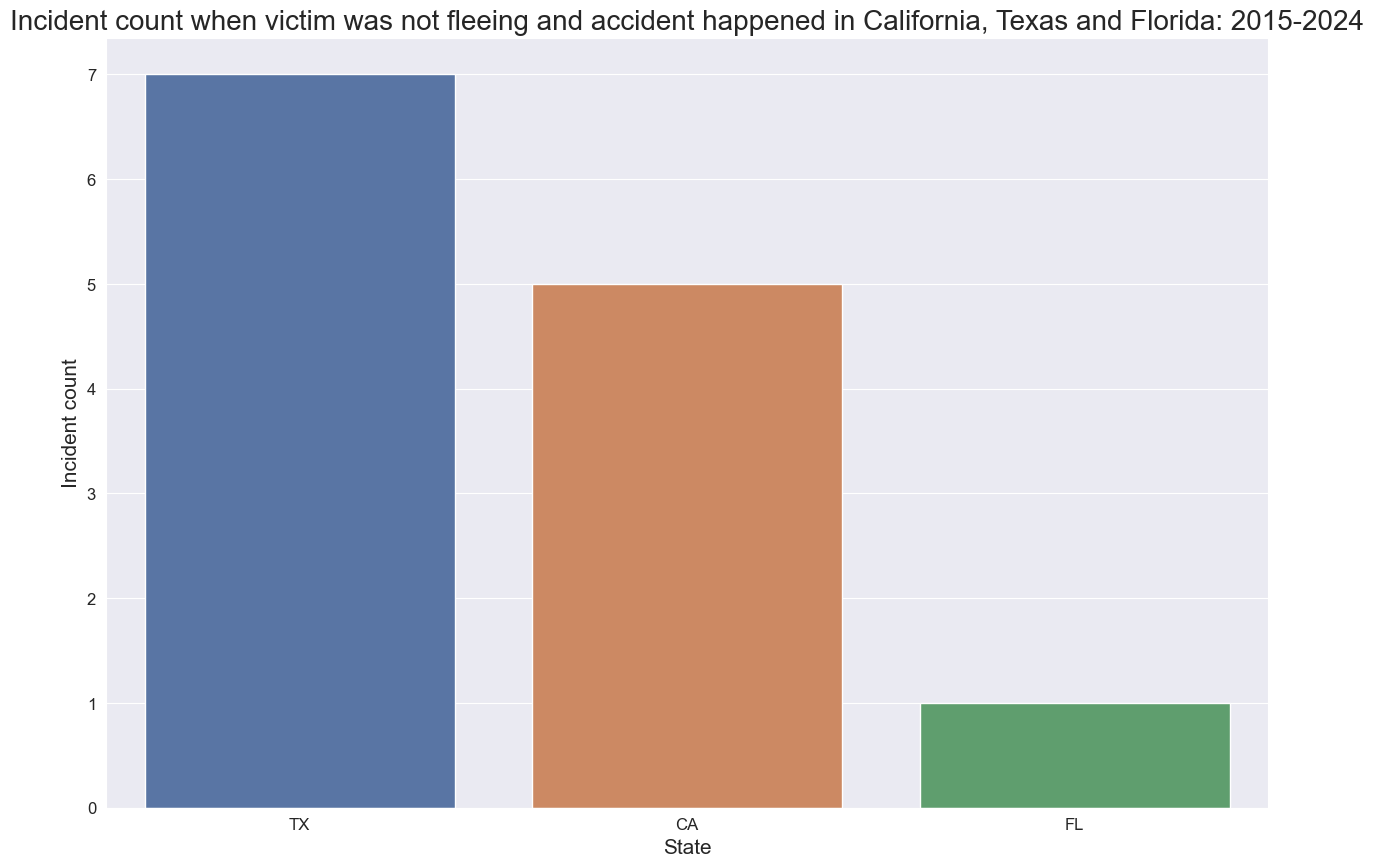

In [81]:
# Incidents where victims were not fleeing and accident happened
fleeing = filtered_washington_post.flee_status == "not"
not_threatening_1 = filtered_washington_post.threat_type == "accident"
date_counts_nfst = (
    filtered_washington_post[
        fleeing & not_undetermined & not_threatening_1
    ]
    .groupby(["state", "threat_type"])["name"]
    .count()
)
date_counts_nfst = date_counts_nfst.sort_values(ascending=False)
date_counts_nfst = date_counts_nfst.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(
    data=date_counts_nfst,
    x="state",
    y="name",
    hue="state",
    palette="deep",
)
plt.title(
    "Incident count when victim was not fleeing and accident happened "
    "in California, "
    "Texas and Florida: 2015-2024",
    fontsize=20,
)
plt.xlabel("State", fontsize=15)
plt.ylabel("Incident count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.show()

In [82]:
# Calculating Spearman and Pearson coefficients
correlation_coefficient_p = round(
    date_counts_fs["name"].corr(date_counts_tt["name"]), 2
)
correlation_coefficient_s = round(
    date_counts_fs["name"].corr(
        date_counts_tt["name"], method="spearman"
    ),
    2,
)
print(
    f"Pearson correlation coefficient between monthly flee_status and threat type in California, Texas and Florida is"
    f" {correlation_coefficient_p}."
)
print(
    f"Spearman correlation coefficient between monthly flee_status and threat type in California, Texas and Florida is "
    f"{correlation_coefficient_s}."
)

Pearson correlation coefficient between monthly flee_status and threat type in California, Texas and Florida is 0.92.
Spearman correlation coefficient between monthly flee_status and threat type in California, Texas and Florida is 1.0.


#### Insights:
- More deadly force incidents in California, Texas and Florida happened when victims were not fleeing.
- The amount cases that have undetermined flee status in California, Texas and Florida is 9.0 %.
- More incidents happened when victims were threatening the police, compared to not threatening.
- More incidents overall happened when victims were not fleeing and threatening the police compared to fleeing and threatening the police.
- Comparably less incidents happened when victims were not fleeing and accident happened.
- Flee status and threat type are highly correlated features according to accident counts

#### Counties that are involved in these cases the most
<span style="color:green">Goal</span>:
1. Showing counts of  deadly force incidents in different counties by map

In [83]:
# Counting incident in different counties
date_counts_county = washington_post.groupby(["state", "county"])[
    "name"
].count()
date_counts_county = date_counts_county.sort_values(ascending=False)
date_counts_county = date_counts_county.reset_index()
date_counts_county.set_index("state", inplace=True)
print("Counties that have the most incidents, top10:")
date_counts_county.head(10)

Counties that have the most incidents, top10:


county  name
state                      
CA        Los angeles   248
AZ           Maricopa   246
TX             Harris   142
CA     San bernardino   126
CA         California   113
NV              Clark   104
TX              Bexar    96
CA          Riverside    93
CA          San diego    80
IL               Cook    80

In [84]:
# Mapping the counts
color_ramp = [
    "#0000ff",  # Blue
    "#00ff00",  # Green
    "#ffff00",  # Yellow
    "#ff7f00",  # Orange
    "#ff0000",  # Red
]
map = folium.Map(location=[37, -102], zoom_start=3)
file_path = (
    "/Users/agnekrupinskaite/PycharmProjects/"
    "agkrupi-DWWP.4.1/GeoJson/counties.geojson"
)
geo_json_data = file_path
folium.Choropleth(
    geo_data=geo_json_data,
    name="choropleth",
    data=date_counts_county,
    columns=["county", "name"],
    key_on="feature.properties.NAME",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color="#cccccc",
    legend_name="Incidents",
    colors=color_ramp,
    bins=5,
).add_to(map)

folium.LayerControl().add_to(map)

file_path = (
    "/Users/agnekrupinskaite/PycharmProjects/"
    "agkrupi-DWWP.4.1/Folium maps/"
    "amount_of_incidents_in_different_counties.html"
)
print(
    "County mapping according to police deadly force incident count"
)
map.save(file_path)
map

County mapping according to police deadly force incident count


#### Insights
- 5 out of 10 counties that have the highest incident count are located in California.
- 2 out of 10 counties that have the highest incident count are located in Texas.
- Some counties do not have any deadly force incidents or they are not tracked. These counties ar marked gray in the map.

## State size as factor
<span style="color:green">Goal</span>:
1. Evaluate if state size is related to the amount of incidents.

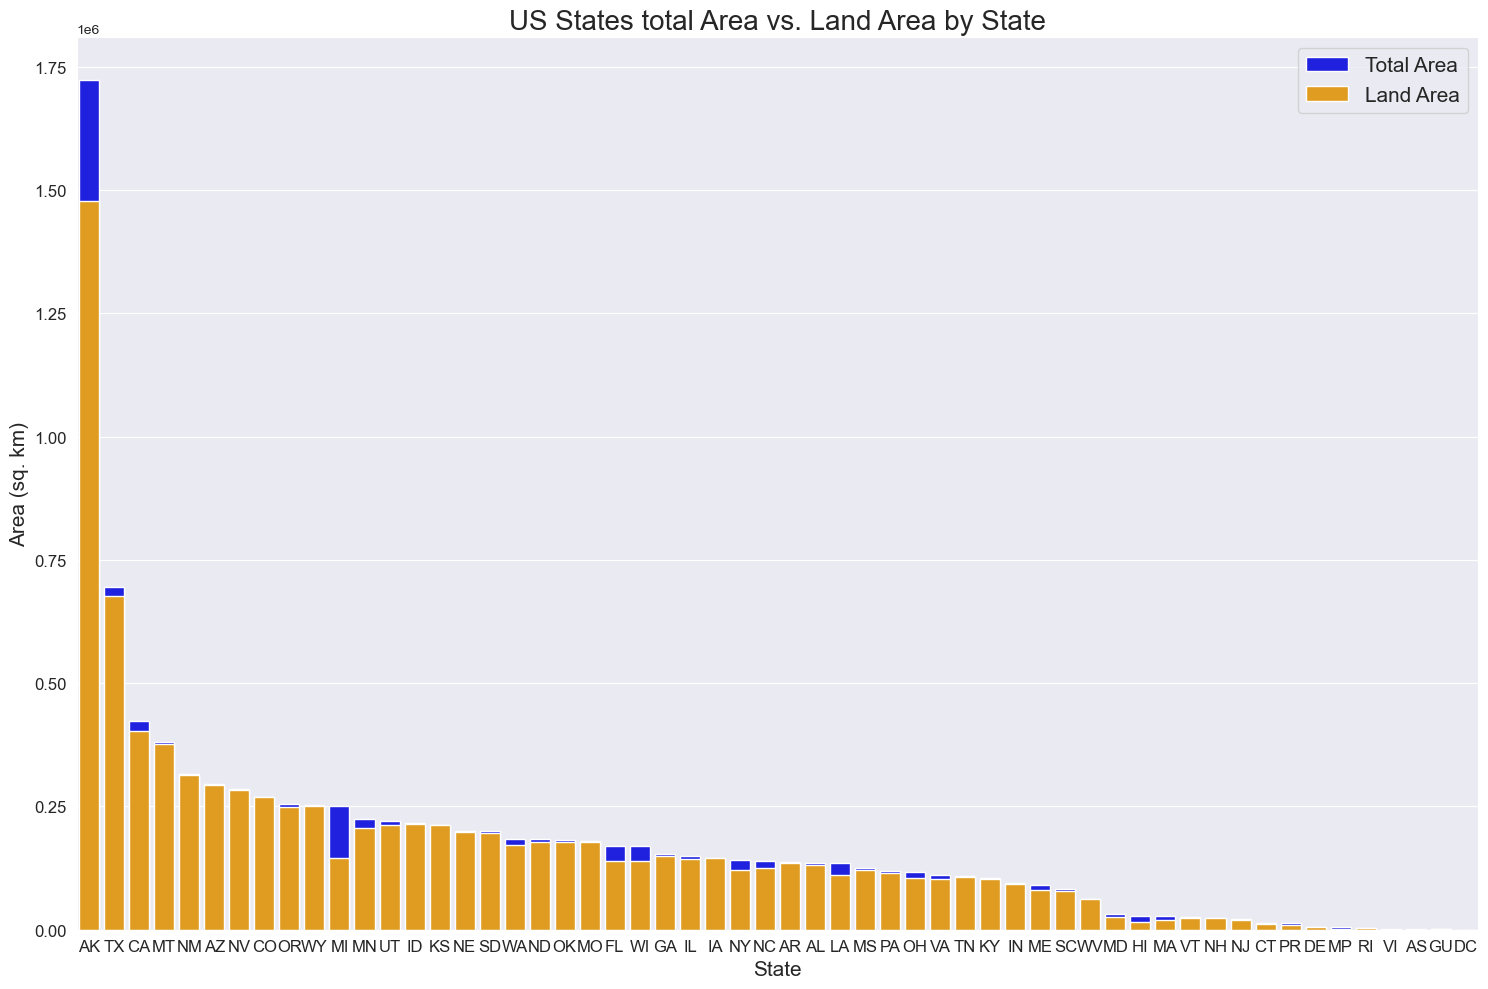

In [85]:
# Plotting different states size and land area
file_path = (
    "/Users/agnekrupinskaite/PycharmProjects/"
    "agkrupi-DWWP.4.1/Data_sources/us_states_sizes.csv"
)
states_sizes = pd.read_csv(file_path, sep=";")
states_sizes = states_sizes.sort_values(
    by="total_area_km2", ascending=False
)

plt.figure(figsize=(15, 10))
sns.barplot(
    data=states_sizes,
    x="State",
    y="total_area_km2",
    color="blue",
    label="Total Area",
)
sns.barplot(
    data=states_sizes,
    x="State",
    y="land_area_km2",
    color="orange",
    label="Land Area",
)
plt.title("US States total Area vs. Land Area by State", fontsize=20)
plt.xlabel("State", fontsize=15)
plt.ylabel("Area (sq. km)", fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.tight_layout()
plt.show()

In [86]:
# Extracting top 5 states with the highest total area
print("States that have highest total area:")
states_sizes[["State", "total_area_km2", "water_"]].head(5)

States that have highest total area:


State  total_area_km2  water_
1     AK         1723337    14.2
47    TX          695662     2.7
5     CA          423967     4.8
28    MT          380831     1.0
33    NM          314917     0.2

#### Insights
- Two of the states that have the highest accident count, also have the highest total area. That would be California and Texas.

### US population trends
<span style="color:green">Goal</span>:
1. To analyze if population changes have similar tendencies to deadly force accidents.

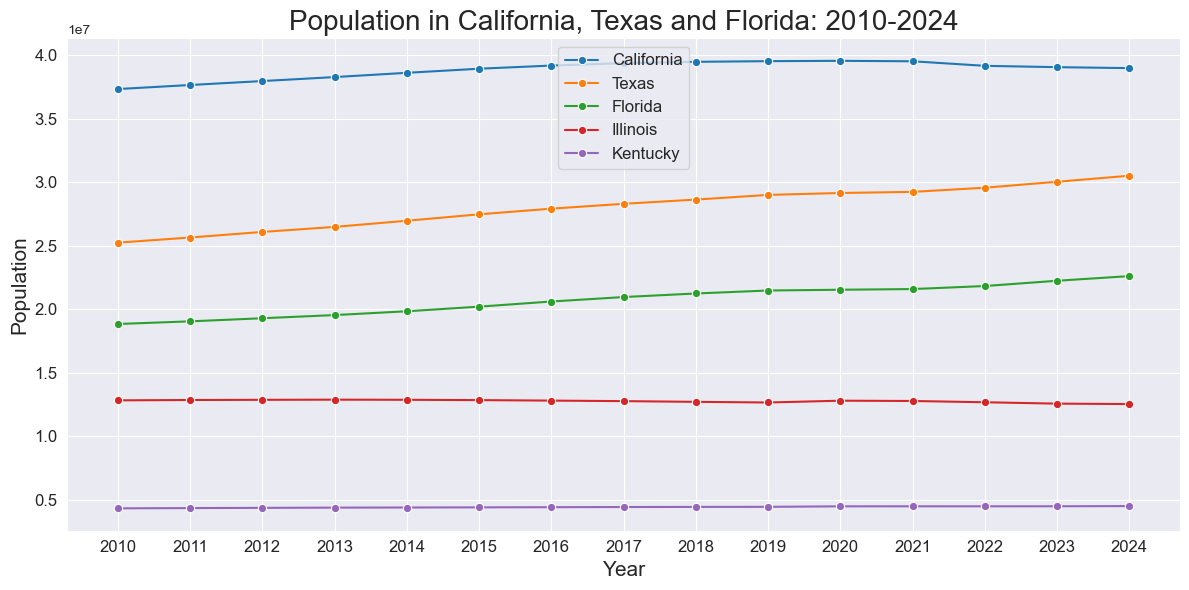

In [87]:
file_path = (
    "/Users/agnekrupinskaite/PycharmProjects/agkrupi-DWWP.4.1/"
    "Data_sources/us_population_2010-2024.csv"
)

population = pd.read_csv(file_path, sep=";")
population = population.sort_values(by="2024", ascending=False)
population = population.melt(
    id_vars="NAME", var_name="Year", value_name="Population"
)

california = population.NAME == "California"
texas = population.NAME == "Texas"
florida = population.NAME == "Florida"
illinois = population.NAME == "Illinois"
kentucky = population.NAME == "Kentucky"

population_ctf = population[
    california | texas | florida | illinois | kentucky
].reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=population_ctf,
    x="Year",
    y="Population",
    hue="NAME",
    marker="o",
)
plt.title(
    "Population in California, Texas and Florida: 2010-2024",
    fontsize=20,
)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Population", fontsize=15)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(fontsize="large")
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.tight_layout()
plt.show()

In [88]:
print(
    "States that have the highest population through the 2010-2023:"
)
population.sort_values(by="Population", ascending=False).head()

States that have the highest population through the 2010-2023:


NAME  Year  Population
520  California  2020    39538212
468  California  2019    39512223
572  California  2021    39503200
416  California  2018    39461588
364  California  2017    39358497

#### Insights
- California has the highest population through the 2017-2020.
- Texas, California and Florida have growing tendency through 2010-2024.

## Firearm checkups external dataset
Explanation: The FBI provides data on the number of firearm checks by month, state, and type. These statistics represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.
<span style="color:green">Goal</span>:
1. To evaluate if firearm checks in different states have the same tendencies as the accident count by state.

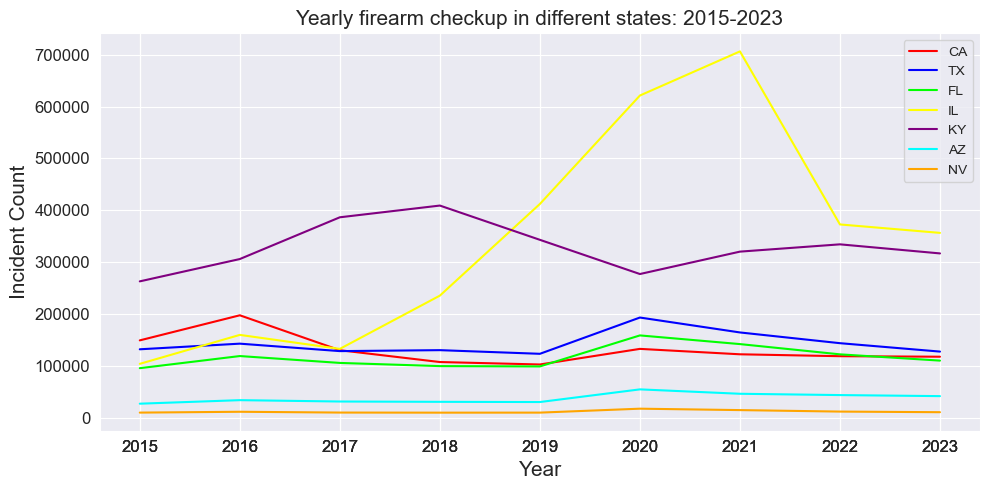

In [89]:
# Plotting firearm checks
file_path = "/Users/agnekrupinskaite/PycharmProjects/agkrupi-DWWP.4.1/Data_sources/nics-firearm-background-checks.csv"
gun_holding = pd.read_csv(file_path)
alabama = gun_holding.state == "Alabama"

gun_holding["month"] = pd.to_datetime(
    gun_holding["month"], format="%Y-%m"
)
gun_holding.rename(columns={"month": "date"}, inplace=True)
columns_to_drop = [
    "permit",
    "permit_recheck",
    "handgun",
    "long_gun",
    "other",
    "multiple",
    "admin",
    "prepawn_handgun",
    "prepawn_long_gun",
    "prepawn_other",
    "redemption_handgun",
    "redemption_long_gun",
    "redemption_other",
    "returned_handgun",
    "returned_long_gun",
    "returned_other",
    "rentals_handgun",
    "rentals_long_gun",
    "private_sale_handgun",
    "private_sale_long_gun",
    "private_sale_other",
    "return_to_seller_handgun",
    "return_to_seller_long_gun",
    "return_to_seller_other",
]
gun_holding.drop(columns_to_drop, axis=1, inplace=True)

# Dropping unnecessary rows from dataset
start_date = "1998-11-01"
end_date = "2015-01-02"

# Drop rows where within the specified date interval
gun_holding = gun_holding[
    (gun_holding["date"] < start_date)
    | (gun_holding["date"] > end_date)
]

# Counting firearms in different states
gun_holding["year"] = gun_holding["date"].dt.year
yearly_count_gh = gun_holding.groupby(["year", "state"])[
    "totals"
].mean()
yearly_count_gh = yearly_count_gh.reset_index()

california = yearly_count_gh.state == "California"
texas = yearly_count_gh.state == "Texas"
florida = yearly_count_gh.state == "Florida"
illinois = yearly_count_gh.state == "Illinois"
kentucky = yearly_count_gh.state == "Kentucky"
arizona = yearly_count_gh.state == "Arizona"
nevada = yearly_count_gh.state == "Nevada"

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=yearly_count_gh[california],
    x="year",
    y="totals",
    color="#FF0000",
    label="CA",
)
sns.lineplot(
    data=yearly_count_gh[texas],
    x="year",
    y="totals",
    color="#0000FF",
    label="TX",
)
sns.lineplot(
    data=yearly_count_gh[florida],
    x="year",
    y="totals",
    color="#00FF00",
    label="FL",
)
sns.lineplot(
    data=yearly_count_gh[illinois],
    x="year",
    y="totals",
    color="#FFFF00",
    label="IL",
)
sns.lineplot(
    data=yearly_count_gh[kentucky],
    x="year",
    y="totals",
    color="#800080",
    label="KY",
)
sns.lineplot(
    data=yearly_count_gh[arizona],
    x="year",
    y="totals",
    color="#00FFFF",
    label="AZ",
)
sns.lineplot(
    data=yearly_count_gh[nevada],
    x="year",
    y="totals",
    color="#FFA500",
    label="NV",
)
plt.title(
    "Yearly firearm checkup in different states: 2015-2023",
    fontsize=15,
)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Incident Count", fontsize=15)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.xticks(yearly_count["year"])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
print("The year and the states that have the most firearm checkups:")
yearly_count_gh.sort_values(by="totals", ascending=False).head(10)

The year and the states that have the most firearm checkups:


year     state         totals
344  2021  Illinois  706208.750000
289  2020  Illinois  621255.416667
234  2019  Illinois  412464.166667
183  2018  Kentucky  409370.083333
128  2017  Kentucky  386790.000000
399  2022  Illinois  373004.583333
454  2023  Illinois  356763.444444
238  2019  Kentucky  343407.666667
403  2022  Kentucky  334709.166667
348  2021  Kentucky  320671.750000

#### Insights
- Illinois have the highest amount of firearm checkups in 2021, 2020 and 2019, however has only 193 incidents compared to California 1304.
- Kentucky also have higher amount of firearm checkups in 2018, 2017, 2019, 2022, 2021, but also significantly lower incident count of 163.
- California, Texas and Florida, have similar amount of firearm checkups every year, which is changing less very year, compared to Illinois and Kentucky.

## Firearm laws grade in US
<span style="color:green">Goal</span>:
1. Evaluate if firearms laws grade have impact on police deadly force.

In [91]:
# Importing state gun laws
file_path = (
    "/Users/agnekrupinskaite/PycharmProjects/"
    "agkrupi-DWWP.4.1/Data_sources/"
    "us_gun_law_grades.csv"
)
gun_laws = pd.read_csv(file_path, sep=";")
gun_laws.set_index("state");

In [92]:
# Mapping the counts
color_ramp = [
    "#0000ff",  # Blue
    "#00ff00",  # Green
    "#ffff00",  # Yellow
    "#ff7f00",  # Orange
    "#ff0000",  # Red
]
map = folium.Map(location=[37, -102], zoom_start=3)
file_path = (
    "/Users/agnekrupinskaite/PycharmProjects"
    "/agkrupi-DWWP.4.1/GeoJson/us-states.json"
)
geo_json_data = file_path
folium.Choropleth(
    geo_data=geo_json_data,
    name="choropleth",
    data=gun_laws,
    columns=["state", "gun law grade"],
    key_on="feature.properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="firearm law grade",
    colors=color_ramp,
).add_to(map)

folium.LayerControl().add_to(map)
file_path = (
    "/Users/agnekrupinskaite/PycharmProjects/"
    "agkrupi-DWWP.4.1/Folium maps/"
    "gun_law_grades_in_US.html"
)
print(
    "Firearm gun score mapping by state by 0-100 (strictest to least strict)"
)
print(
    "*Scoring is based on Giffords gun law scorecard from "
    "A to F (strictest to least strict and converted to the 100-0 scale."
)
map.save(file_path)
map

Firearm gun score mapping by state by 0-100 (strictest to least strict)
*Scoring is based on Giffords gun law scorecard from A to F (strictest to least strict and converted to the 100-0 scale.


#### Insights
- Firearm laws are the strictest in the California, Massachusetts, Connecticut, Maryland, Hawaii, New Jersey, Illinois and New York.
- Texas has the least strict firearm related laws.
- Florida, has moderately strict firearm related laws.

# Summary
<span style="color:green">Goal</span>: To identify what factors affect the use of deadly police force in US.
<span style="color:green">Narrative</span>: Analysis of the differences between US states is chosen since each state can have slightly different legislation.
<span style="color:green">Location data cleaning results</span>: missing 4731 county, 71 city, and 1034 of each latitude longitude and location precision values where possible imputed or determined as undetermined.
<span style="color:green">Case and victim data cleaning results</span>: 1171 race, 1282 flee_status, 388 age, 352 name, 212 armed_with, 67 threat_type and 25 gender values where possible imputed from Fatal Encounters dataset or computationally or identified and "undetermined".

<span style="color:green">Exploratory data analysis main insights</span>:
1. Yearly count of deadly force usage by police in the US is growing during 2016-2023.
2. Highest amount of incident happen on the March, August and December months. December in the US is also a holiday season.
3. The impact of specific holidays was not identified during this analysis. results showed that 6, 11, and 15 days of the month are the most repeating days in the dataset. Overall highest incident count through the years have 5th, 3rd and 9th days of the month.
4. During the years of 2015-2024. The 5 states that had the most incidents related to police aggression were California, Texas, Florida, Arizona and Georgia. They make up 38.0 % of all incidents deadly force incidents in the US.
5. Most people involved in accidents in California are Hispanic. Most people involved in accidents in Texas are White. Black people are the most involved in accidents in Texas and Florida. Florida also has high incident count with withe people involved. This only shows the states that stand out with high overall incident and race related incident count are California, Texas and Florida. To understand this insight better, additional resource such as race distribution in different states population is needed.
6. Pearson and Spearman correlation show, that day and incident count in different states are not related.
7. Pearson and Spearman correlation show, month and incident count in different states are not related .

<span style="color:green">Narrowing the scope of the analysis: California, Texas and FLorida</span>:
1. Pearson and Spearman correlation show, month and incident count in California, Teas and Florida are not related .
2. Female percentage involved in fatal shooting accidents in California, Texas and Florida is 5.0 %. This means that 95.0 % of accidents involve men. However, it is not clear if the dataset is biased towards men, or any behavioural differences more often lead to police usage of deadly force towards men.
3. More deadly force usage incidents in California, Texas and Florida happened when victims were not fleeing. More incidents overall happened when victims were not fleeing and threatening the police compared to the cases where victims were fleeing and threatening the police. However, the amount of cases that have undetermined flee status in California, Texas and Florida is 9.0 %. Efforts should be put to collect more details about deadly force cases to understand the police behaviour better. Flee status and threat type are highly correlated features according to accident counts by Pearson and Spearman coefficients.
4. 5 out of 10 counties that have the highest incident count are located in California. 2 out of 10 counties that have the highest incident count are located in Texas. More information is needed to understand if the counties have biggest population, or are there any other deadly force incident driving forces.
5. Some counties do not have any deadly force incidents. These counties ar marked gray in the map. This creates question about how different counties and states or even databases track these incidents, are the counties without have better different approach to the use of deadly force, or the incidents are not tracked / tracked not well.
6. Population and area impact: Texas, California and Florida had growing population through 2010-2024, with California having the highest overall population through the 2017-2020. Also California and Texas have overall the highest total area count. Could be that higher amount of incident are related to overall higher amount of population and therefore also higher amount of criminal activity.
7. Texas had the highest amount of incidents in 2020. California had the highest amount of incidents in 2015. Texas had the highest amount of incidents in 2019. Most incidents in California, Texas and Florida happened in 2020 May, 2023 January and 2015 July. These months and years can be checked to evaluate if any changes in migration, employment or changes of legislation happened.
8. Firearm laws and Firearm checkups in the US: Firearm laws are the strictest in the California, the least strict in Texas and moderately strict in the Florida. Interesting that states with the biggest population have different firearm legislation but still comparably high incident count. Interestingly enough neither California, nor Florida or Texas are not the states that have the highest firearm checkup counts. The states that have the highest firearm checkup counts are Illinois with relatively high population and strict firearm laws and Kentucky that have only 193 and 163 incident counts comparing to California, which has 1304. The research gap in this case is firearm checkup can not be counted as firearm sale. Sales data would provide more important insights. Nevertheless, the question is are firearm checkups performed differently on the different states. Do less people in California want to buy a gun or the less checkups are performed and more illegal guns are being sold leading to the increased amounts of incident where police use deadly force.

<span style="color:green">Other insights</span>:
1. Different databases on the Interned even dedicated for the similar or same purpose have different data standardisation. This is data management gap, that makes it more complicated to combine knowledge from few sources such as Washington Post and Fatal Encounters database. This could be addressed in other researchers work.
2. Imputing race from surname computationally is a complicated task, since people have different amounts of surnames that can change in life, more over all. Ethnicolr library and its model census_ln did not show good performance on this dataset.
3. Gender can be imputed using libraries such as gender_guesser.
4. Geocoding is a powerful approach. Reversed part of geocoding might benefit from providing additional details, like if using city to retrieve coordinates, amount of false positive identifications can be reduced by adding state or country to the function.
5. Retrieval of missing names is also possible. More details are provided, more names can be retrieved. However, too high amount of details might make the retrieval strategy too narrow and reduce ability to impute the values.
6. GeoJson files is a great tool for plotting difference between different geographic locations. However, files or main data should always have matching formats.

# Future analysis ideas
1. Analyze accidents variables when body camera was present and when not.
2. Give more attention to the states, where victims were hurt by accident.
3. Analyse fleeing situation impact on deadly force count more in depth: correlation coefficients of various groups, machine learning model.
4. Retrieve dataset about mental health issues in different states in US during different years and compare the results with the deadly force accident count.
5. Retrieve dataset about firearm purchase, license owners count. Not only checkups to have better look at comparison
6. Identify states that have the highest accident count but the lowest population and investigate potential issues.
7. Analyze employment and average income changed. This could be an important criteria during COVID19 pandemic years and could impact people behaviour and the same way the deadly force.
8. Include data about drug addictions in different states and see if there are any correlations between police deadly force accident and the drug addictions.